# Linear Regression



"Regression is a form of supervised machine learning, which is where the scientist teaches the machine by showing it features and then showing it what the correct answer is, over and over, to teach the machine. Once the machine is taught, the scientist will usually "test" the machine on some unseen data, where the scientist still knows what the correct answer is, but the machine doesn't."

In the example in the links above they use stock prices. We are going to use salary data, found here: https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression

It has been downloaded and put into AWS already.

Supervised Learning needs Features & Labels 
    Features are the descriptive attributes
    Label is what you're attempting to predict or forecast 

In this example:
    Label: 
    Salary        
    Features: 
    YearsExperience


##### We are going to try to predict the Salary based on the Years Experience

Create your environment: you can skip this step because everything is setup on AWS already

In [1]:
#replace YOUNAMEHERE_LR with your firstInitialLastName_LR for example msack_LR then uncomment and run the cell
#conda create -n YOUNAMEHERE_LR numpy scipy scikit-learn matplotlib pandas 

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing #module used to do some cleaning/scaling of data prior to machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor #our machine learning algorithms to demonstrate results
import seaborn as sns
from sklearn.metrics import *


Import the Salary_Data.csv file as a DataFrame and describe the DataFrame

In [3]:
dataDir = "/Users/mandysack/Desktop/"

df = pd.read_csv(dataDir+"Salary_Data.csv")
df.describe()
#scikit requires numpy arrays so at some point 
#we will need to convert this DataFrame to a NumPy array

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In the example we will use this notebook for, we will be forcasting out 1 item.

We want to keep the last items of the DataFrame to compare against for later.
The item in the Salary column should be saved as y_true, and the item in YearsExperience should be saved as x_true. The y_true variable should be saved as a np array for use later.


In [4]:
y_true = df['Salary'].iloc[29]
x_true = df['YearsExperience'].iloc[29]
y_true = np.asarray([y_true])
print(df)


    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


Using the shift function, shift the Salary column by the negative forecast_out variable. 

How is this different from shifting the by the positive forecast_out?
Do you notice anything about the DateFrame that is differnt from the original DataFrame?

In [5]:
forecast_out = int(math.ceil(0.01 * len(df)))
print(forecast_out)
df['Salary'] = df['Salary'].shift(-forecast_out)
print(df)


1
    YearsExperience    Salary
0               1.1   46205.0
1               1.3   37731.0
2               1.5   43525.0
3               2.0   39891.0
4               2.2   56642.0
5               2.9   60150.0
6               3.0   54445.0
7               3.2   64445.0
8               3.2   57189.0
9               3.7   63218.0
10              3.9   55794.0
11              4.0   56957.0
12              4.0   57081.0
13              4.1   61111.0
14              4.5   67938.0
15              4.9   66029.0
16              5.1   83088.0
17              5.3   81363.0
18              5.9   93940.0
19              6.0   91738.0
20              6.8   98273.0
21              7.1  101302.0
22              7.9  113812.0
23              8.2  109431.0
24              8.7  105582.0
25              9.0  116969.0
26              9.5  112635.0
27              9.6  122391.0
28             10.3  121872.0
29             10.5       NaN


It is a typical standard with machine learning in code to define X (capital x), 
as the features, and y (lowercase y) as the label that corresponds to the features. 

Create a np.array with all of the columns EXCEPT the Salary column (hint: use drop ) and set it to X 
Create a np array with the label column and set it to y

In [6]:
X = np.array(df.drop(['Salary'], 1))
X


array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

Generally, you want your features in machine learning to be in a range of -1 to 1. 
This may do nothing, but it usually speeds up processing and can also help with accuracy. 
Because this range is so popularly used, it is included in the preprocessing module of Scikit-Learn. 
To utilize this, you can apply preprocessing.scale to your X variable:

In [7]:
X = preprocessing.scale(X)
X_forecasted = X[-forecast_out:] #-> this is really 10.5 aka iloc[29]
X = X[:-forecast_out]
print(X_forecasted)
print(X)


[[1.85889428]]
[[-1.51005294]
 [-1.43837321]
 [-1.36669348]
 [-1.18749416]
 [-1.11581443]
 [-0.86493538]
 [-0.82909552]
 [-0.75741579]
 [-0.75741579]
 [-0.57821647]
 [-0.50653674]
 [-0.47069688]
 [-0.47069688]
 [-0.43485702]
 [-0.29149756]
 [-0.1481381 ]
 [-0.07645838]
 [-0.00477865]
 [ 0.21026054]
 [ 0.2461004 ]
 [ 0.53281931]
 [ 0.6403389 ]
 [ 0.92705781]
 [ 1.03457741]
 [ 1.21377673]
 [ 1.32129632]
 [ 1.50049564]
 [ 1.5363355 ]
 [ 1.78721455]]


We had to drop the na that we just created for the 29th row of Salary 
(what we are predicting) so that we can test and train. 

This will allow us to predict the 29th row.


In [8]:
df.dropna(inplace=True)
print(df)

    YearsExperience    Salary
0               1.1   46205.0
1               1.3   37731.0
2               1.5   43525.0
3               2.0   39891.0
4               2.2   56642.0
5               2.9   60150.0
6               3.0   54445.0
7               3.2   64445.0
8               3.2   57189.0
9               3.7   63218.0
10              3.9   55794.0
11              4.0   56957.0
12              4.0   57081.0
13              4.1   61111.0
14              4.5   67938.0
15              4.9   66029.0
16              5.1   83088.0
17              5.3   81363.0
18              5.9   93940.0
19              6.0   91738.0
20              6.8   98273.0
21              7.1  101302.0
22              7.9  113812.0
23              8.2  109431.0
24              8.7  105582.0
25              9.0  116969.0
26              9.5  112635.0
27              9.6  122391.0
28             10.3  121872.0


Next, create the label, y: 

This will be the Salary column.

In [9]:
y = np.array(df['Salary'])
print(y)

[ 46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.  57189.
  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.  81363.
  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969. 112635.
 122391. 121872.]


Now comes the training and testing. The way this works is you take, for example, 75% of your data, and use this to train the machine learning regressor. Then you take the remaining 25% of your data, and test the regressor. 

There are many ways to do this, but, probably the best way is using the built in train_test_split (in SKLEARN).

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Next we have to define our Regressor. This example will use SGDRegressor from Scikit-Learn's linear_model package. 

From the docs:

Linear model fitted by minimizing a regularized empirical loss with SGD

SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.

This implementation works with data represented as dense numpy arrays of floating point values for the features.

Why did we choose this one? (hint: look here)
https://scikit-learn.org/stable/tutorial/machine_learning_map/


In [11]:
linreg = SGDRegressor(max_iter=1000, tol=1e-3, warm_start=True)

Some Regressors use samples weights to be added to examples. 

The sample_weight is used in the fit and score functions. The value must be the same size as the arrays in either function. 

In our example, the sample_weight array must be of size 20 for the fit function and 9 for the score function.

In the cell below, I have found created sample_weight arrays for you to use if you choose. 

Try restarting the kernel a couple times once you have it scored... notice how the performance changes?


In [12]:
#train
#sample_weight = 100 * np.abs(np.random.randn(20))
sample_weight = [ 67.05266499 , 55.93249111 , 115.68590207 , 80.58313832 , 48.75297254 , 215.39344235 , 182.05129654 , 28.6097126 , 89.12019603 , 97.66917761 , 14.76617733 , 168.50825818 , 51.01713737 , 15.16010692 , 98.9410897 , 18.10261534 , 207.95597892 , 14.42839119 , 196.6054604 , 28.4394922 ]
print(sample_weight)

#test / score
#sample_weight1 = 100 * np.abs(np.random.randn(9))

sample_weight1= [67.34502598 , 31.77634733 , 81.682669 , 62.30697964 ,  48.51259691 , 45.23509357 , 3.46158233 , 63.15694268 , 58.49065105]

[67.05266499, 55.93249111, 115.68590207, 80.58313832, 48.75297254, 215.39344235, 182.05129654, 28.6097126, 89.12019603, 97.66917761, 14.76617733, 168.50825818, 51.01713737, 15.16010692, 98.9410897, 18.10261534, 207.95597892, 14.42839119, 196.6054604, 28.4394922]


Train the Regressor using the  Scikit-Learn (sklearn) fit() function


In [13]:

linreg.fit(X_train, y_train, sample_weight=sample_weight)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=True)

Now we can test our classifier recieve our confidence score using  Scikit-Learn (sklearn) score function

According to the SKLEARN documentation the score function:
    Return the coefficient of determination R^2 of the prediction.
    The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [14]:

confidence = linreg.score(X_test, y_test, sample_weight1)
print(confidence)

0.9589611487139913


Changing the loss function is an example of a hyperparameter that can change the performance of the model.
With the SGDRegressor algorithm, there are 4 potential loss functions for this function. The default is loss='squared_loss'.
Create a new SGDRegressor, fit the data, and score for each of the loss variables. Which one performs the best?
Loss function options:
1. 'squared_loss' -> ordinary least squares fit
2. 'huber' -> modifies ‘squared_loss’ to focus less on getting outliers correct by switching from squared to linear loss past a distance of epsilon
3. 'epsilon_insensitive' -> ignores errors less than epsilon and is linear past that; this is the loss function used in SVR
4. 'squared_epsilon_insensitive' -> same but becomes squared loss past a tolerance of epsilon.


In [15]:
#huber
linreg1 = SGDRegressor(max_iter=1000, tol=1e-3, loss='huber', epsilon=0.1)
linreg1.fit(X_train, y_train)
confidence = linreg1.score(X_test, y_test)
print(confidence)

-6.791315790630701


In [16]:
#epsilon_insensitive
linreg2 = SGDRegressor(max_iter=1000, tol=1e-3, loss='epsilon_insensitive', epsilon=0.1)
linreg2.fit(X_train, y_train)
confidence = linreg2.score(X_test, y_test)
print(confidence)

-6.787459095344002


/opt/anaconda3/envs/msack/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [17]:
#squared_epsilon_insensitive
linreg3 = SGDRegressor(max_iter=1000, tol=1e-3, loss='squared_epsilon_insensitive', epsilon=0.09)
linreg3.fit(X_train, y_train)
confidence = linreg3.score(X_test, y_test)
print(confidence)

0.9558070885493637


There are several different Regression algorithms that are available using scikit-learn. 

Try with the LinearRegression function, what is the score of this model?

In [18]:
linreg4 = LinearRegression()
linreg4.fit(X_train, y_train, sample_weight)
linreg4.score(X_test,y_test, sample_weight1)

0.9675028068662039

Using the predict function, determine what the predicted value is for the best performing model. 

In [19]:
#Exploring using the Metrics with loss 
y_pred = linreg.predict(X_forecasted)
y_pred1 = linreg1.predict(X_forecasted)
y_pred2 = linreg2.predict(X_forecasted)
y_pred3 = linreg3.predict(X_forecasted)
y_pred4 = linreg4.predict(X_forecasted)

predicted_y = [y_pred, y_pred1, y_pred2, y_pred3, y_pred4]
for i in range(len(predicted_y)):
    print(predicted_y[i])

predicted_y = [y_pred, y_pred1, y_pred2, y_pred3, y_pred4]
for y_pred_ in predicted_y:
    evs = explained_variance_score(y_true, y_pred_)

    me = max_error(y_true, y_pred_)

    mae = mean_absolute_error(y_true, y_pred_)

    mse = mean_squared_error(y_true, y_pred_)

    msle = mean_squared_log_error(y_true, y_pred_)

    medae = median_absolute_error(y_true, y_pred_)

    r2 = r2_score(y_true, y_pred_)

    mpd = mean_poisson_deviance(y_true, y_pred_)

    mgd = mean_gamma_deviance(y_true, y_pred_)

    mtd = mean_tweedie_deviance(y_true, y_pred_)
    print("y_pred is {} \n evs = {} \n me = {} \n mae = {} \n mse = {} \n msle = {} \n medae = {} \n r2 = {} \n mpd = {} \n mgd = {} \n mtd = {} \n ***************** ".format(
    y_pred_, evs, me, mae, mse, msle, medae, r2, mpd, mgd, mtd))


[128146.12133071]
[0.04488793]
[19.69711484]
[126808.25703642]
[128391.96854644]
y_pred is [128146.12133071] 
 evs = 1.0 
 me = 6274.121330705588 
 mae = 6274.121330705588 
 mse = 39364598.47241486 
 msle = 0.00251998682353288 
 medae = 6274.121330705588 
 r2 = nan 
 mpd = 312.32503957042354 
 mgd = 0.002478382752784114 
 mtd = 39364598.47241486 
 ***************** 
y_pred is [0.04488793] 
 evs = 1.0 
 me = 121871.95511207361 
 mae = 121871.95511207361 
 mse = 14852773442.839287 
 msle = 136.1148094474078 
 medae = 121871.95511207361 
 r2 = nan 
 mpd = 3367156.000815815 
 mgd = 5430025.395616138 
 mtd = 14852773442.839287 
 ***************** 
y_pred is [19.69711484] 
 evs = 1.0 
 me = 121852.30288516209 
 mae = 121852.30288516209 
 mse = 14847983718.417282 
 msle = 75.35525540547407 
 medae = 121852.30288516209 
 r2 = nan 
 mpd = 1884242.5281930391 
 mgd = 12355.143691100413 
 mtd = 14847983718.417282 
 ***************** 
y_pred is [126808.25703642] 
 evs = 1.0 
 me = 4936.257036419134

/opt/anaconda3/envs/msack/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/msack/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/msack/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/msack/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/msack/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not w

Let's visualize what we have:
1. Create a correlation matrix using seaborn
2. Create a correlation matrix WITH Regression using seaborn

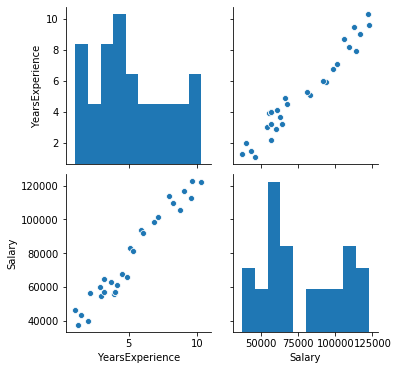

In [20]:
# Create a Correlation Matrix using seaborn
sns.pairplot(df)


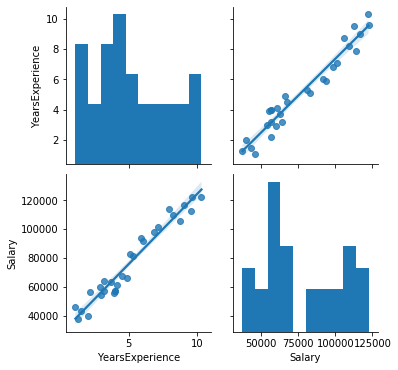

In [21]:
# with regression
sns.pairplot(df, kind="reg")


What is the correlation value? then visualize the correlation matrix using background_gradient.

In [22]:
corr = df.corr()

In [23]:
corr.style.background_gradient(cmap='coolwarm')

,YearsExperience,Salary
YearsExperience,1.000000,0.973281
Salary,0.973281,1.000000


We need to add our Forecasted Salary for Years experience. 
Add a column 'Forecast' to the dataframe and initialize it with np.nann

In [24]:
df['Forecast'] = np.nan
print(df)

    YearsExperience    Salary  Forecast
0               1.1   46205.0       NaN
1               1.3   37731.0       NaN
2               1.5   43525.0       NaN
3               2.0   39891.0       NaN
4               2.2   56642.0       NaN
5               2.9   60150.0       NaN
6               3.0   54445.0       NaN
7               3.2   64445.0       NaN
8               3.2   57189.0       NaN
9               3.7   63218.0       NaN
10              3.9   55794.0       NaN
11              4.0   56957.0       NaN
12              4.0   57081.0       NaN
13              4.1   61111.0       NaN
14              4.5   67938.0       NaN
15              4.9   66029.0       NaN
16              5.1   83088.0       NaN
17              5.3   81363.0       NaN
18              5.9   93940.0       NaN
19              6.0   91738.0       NaN
20              6.8   98273.0       NaN
21              7.1  101302.0       NaN
22              7.9  113812.0       NaN
23              8.2  109431.0       NaN


Now we need to add back in our saved YearsExperience variable (x_true) in the appropriate place. 

We also need to put the y_pred variable in the Forecast column. 


In [25]:
last_row = df.iloc[-1].name
print(last_row)
#This for loop will keep adding onto the dataframe each time it is ran... there should only be 1 item forecasted.
for i in y_pred:
    print(i)
    next_row= last_row + 1
    df.loc[next_row] = [np.nan for _ in range(len(df.columns)-1)]+[i]
    df.loc[next_row,'YearsExperience'] = x_true
df

28
128146.12133070559


,YearsExperience,Salary,Forecast
0,1.1,46205.0,NaN
1,1.3,37731.0,NaN
2,1.5,43525.0,NaN
3,2.0,39891.0,NaN
4,2.2,56642.0,NaN
5,2.9,60150.0,NaN
6,3.0,54445.0,NaN
7,3.2,64445.0,NaN
8,3.2,57189.0,NaN
9,3.7,63218.0,NaN


We cannot do a typical "plot" for the forecasted variable because we are only forecasting the next year of experience. 
Use a scatterplot to plot the salary and forecasted salary for years experience. 
Then, plot a straight line to show the first and last(forecasted) point 


[1.1, 10.5]
[46205.0, 128146.12133070559]


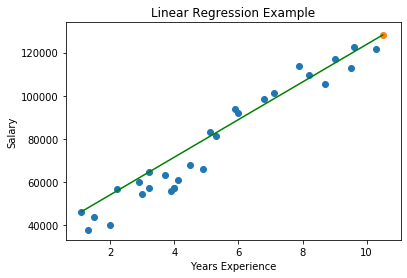

In [26]:
plt.scatter(df['YearsExperience'], df['Salary']) 
plt.scatter(df['YearsExperience'], df['Forecast']) 
#x values
print([df.iloc[0,0], df.iloc[29,0]])
#y values
print([df.iloc[0,1],df.iloc[29,2]])
#Plot the straight line
plt.plot([df.iloc[0,0], df.iloc[29,0]],[df.iloc[0,1],df.iloc[29,2]] ,color = 'green')
plt.title("Linear Regression Example")
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()